# Stroke Prediction

## Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## Attribute Information
1) id: unique identifier      
2) gender: "Male", "Female" or "Other"         
3) age: age of the patient         
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension           
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease                  
6) ever_married: "No" or "Yes"                          
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"                                
8) Residence_type: "Rural" or "Urban"                      
9) avg_glucose_level: average glucose level in blood                 
10) bmi: body mass index                          
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*                 
12) stroke: 1 if the patient had a stroke or 0 if not                                      
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient



In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#"from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Insights

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- We have ***12 attributes*** and ***5110 entries***     
- Average Age is **43**        
- Average Glucose Level recorded is approximately **106.15**       
- Average BMI recorded is approximately **29**      

## Missing values

In [11]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

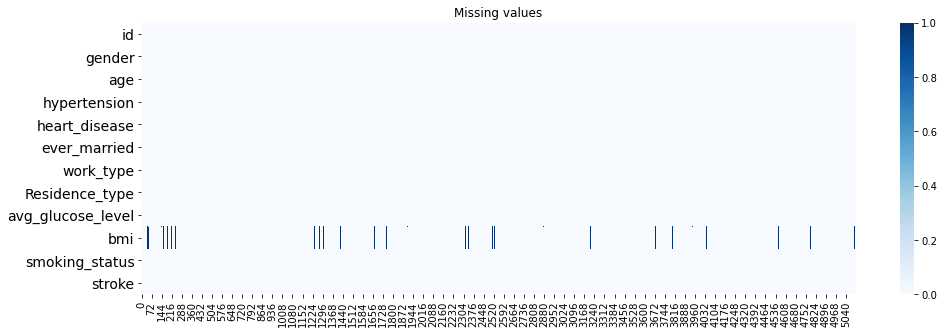

In [35]:
f,ax=plt.subplots(nrows=1,ncols=1,figsize=(16,5))

sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing values')

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

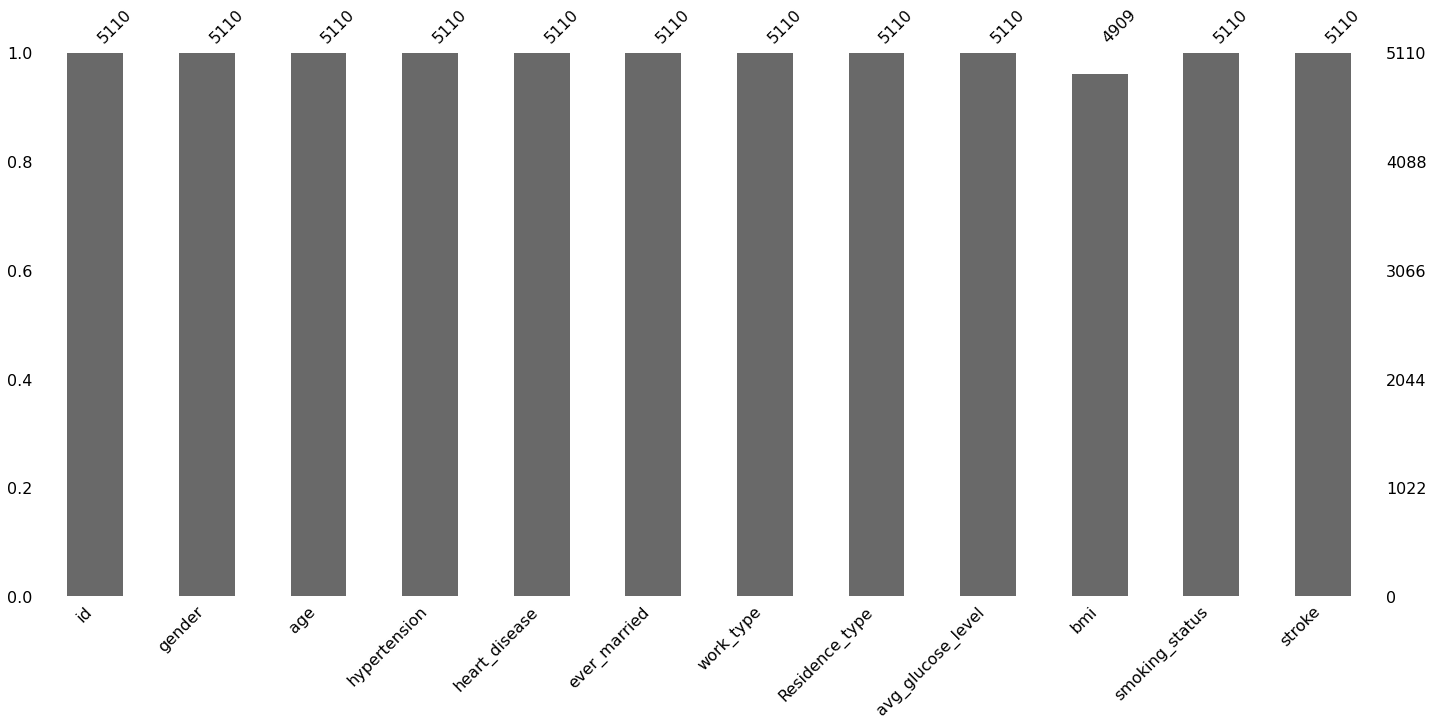

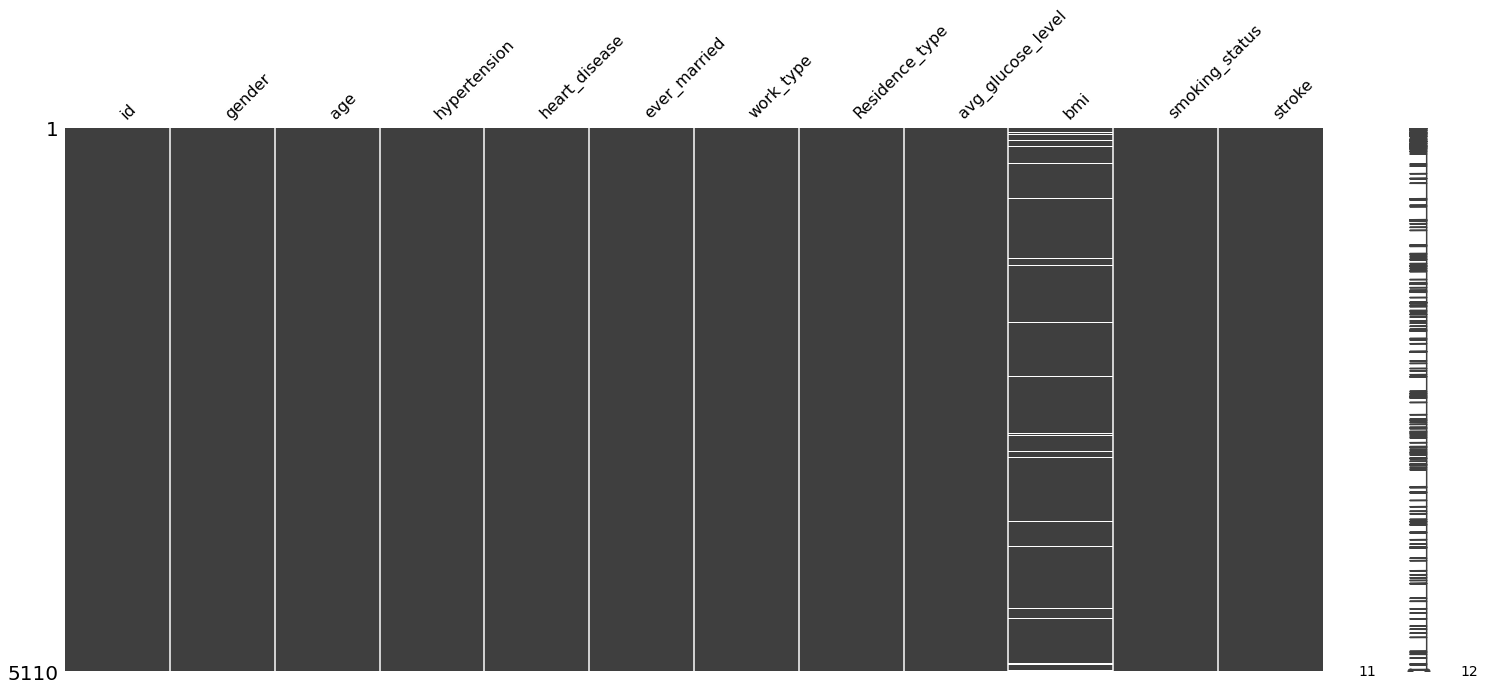

In [46]:
import missingno as msno
msno.bar(df)
plt.show()
msno.matrix(df)
#msno.heatmap(df)

We fill the **missing values** in Body Mass Index variable with **average value**

In [49]:
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(),inplace=True)

In [50]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Data Categorization

We would categorize the existing variables of our existing dataframe into numerical and categorical variables.

In [11]:
df_cat=df.select_dtypes('object')
df_num=df.select_dtypes('number')

In [12]:
# Displaying the initial entries of the new datatypes created
df_cat.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [14]:
# Displaying the initial entries of the new datatypes created
df_num.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


## Data Visualisation

### Corr Heat map

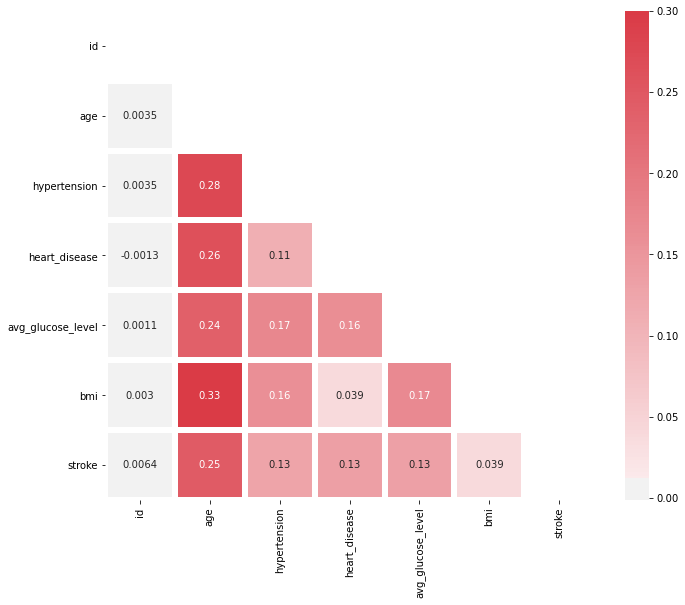

In [66]:
# compute the corr matrix

corr=df.corr()

# generate a mask for upper triangle
mask=np.triu(np.ones_like(corr,dtype=bool))

#set up the matplotlib figure
f, axis=plt.subplots(figsize=(11,9))

#generate a custom diverging colormap
cmap=sns.diverging_palette(250,10,as_cmap=True)

#draw heatmap with mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,annot=True,center=0,square=True,linewidths=5)


### Univariate Analysis

#### Analysis of unique values and their count for each variable

### Count Plot

Unique values gender count:  3
gender values:  ['Male' 'Female' 'Other']
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


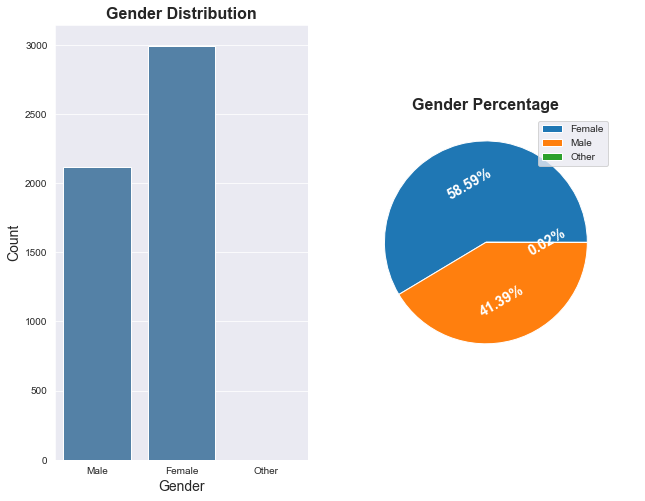

In [112]:
print('Unique values gender count: ', df['gender'].nunique()) 
print('gender values: ', df['gender'].unique())
print(df.gender.value_counts())

fig=plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

ax1=plt.subplot(1,2,1)
sns.countplot(data=df,x='gender',color='steelblue')
ax1.set_xlabel('Gender',fontsize=14)
ax1.set_ylabel('Count',fontsize=14)
ax1.set_title('Gender Distribution',fontweight='bold',fontsize=16)


ax2=plt.subplot(1,2,2)
ax2.pie(pd.value_counts(df['gender']), 
        labels=df.gender.value_counts().index,
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : '30',
                     'color' : 'w'})

ax2.legend()
ax2.set_title('Gender Percentage', fontsize = 16, fontweight = 'bold')
plt.show()



Unique values ever_married count:  2
ever_married values:  ['Yes' 'No']
Yes    3353
No     1757
Name: ever_married, dtype: int64


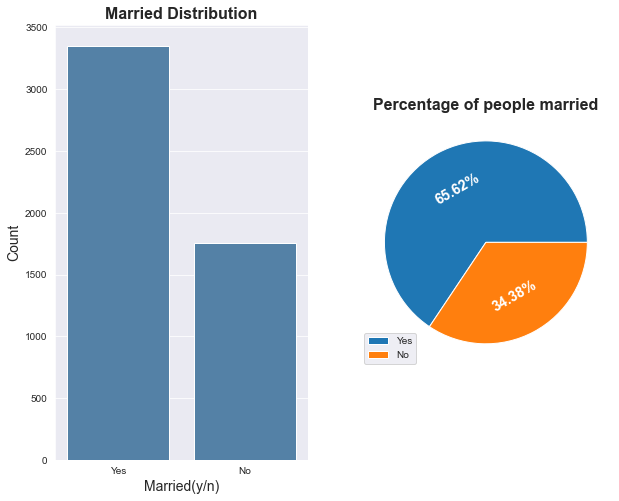

In [119]:
print('Unique values ever_married count: ', df['ever_married'].nunique()) 
print('ever_married values: ', df['ever_married'].unique())
print(df.ever_married.value_counts(),sep='\n')

fig=plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

ax1=plt.subplot(1,2,1)
sns.countplot(data=df,x='ever_married',color='steelblue')
ax1.set_xlabel('Married(y/n)',fontsize=14)
ax1.set_ylabel('Count',fontsize=14)
ax1.set_title('Married Distribution',fontweight='bold',fontsize=16)


ax2=plt.subplot(1,2,2)
ax2.pie(pd.value_counts(df['ever_married']), 
        labels = df.ever_married.value_counts().index,
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : '30',
                     'color' : 'w'})

ax2.legend()
ax2.set_title('Percentage of people married', fontsize = 16, fontweight = 'bold')
plt.show()

Unique values work_type count:  5
work_type values:  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


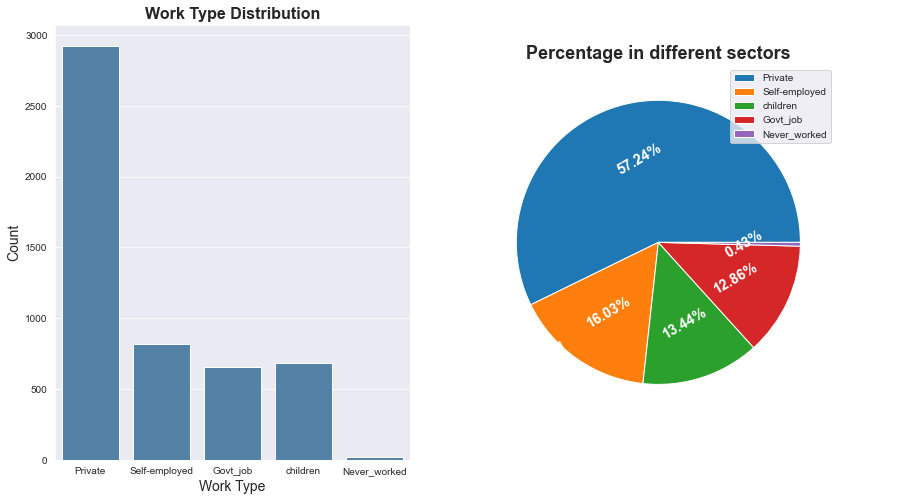

In [120]:
print('Unique values work_type count: ', df['work_type'].nunique())
print('work_type values: ', df['work_type'].unique())
print(df.work_type.value_counts(),sep='\n')

fig=plt.figure(figsize=(14,8))
sns.set_style('darkgrid')

ax1=plt.subplot(1,2,1)
sns.countplot(data=df,x='work_type',color='steelblue')
ax1.set_xlabel('Work Type',fontsize=14)
ax1.set_ylabel('Count',fontsize=14)
ax1.set_title('Work Type Distribution',fontweight='bold',fontsize=16)

ax2=plt.subplot(1,2,2)
ax2.pie(pd.value_counts(df['work_type']), 
        labels = df.work_type.value_counts().index,
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : '30',
                     'color' : 'w'})


plt.legend()
ax2.set_title('Percentage in different sectors', fontsize = 18, fontweight = 'bold')
plt.show()

Unique values Residence_type count:  2
Residence_type values:  ['Urban' 'Rural']
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


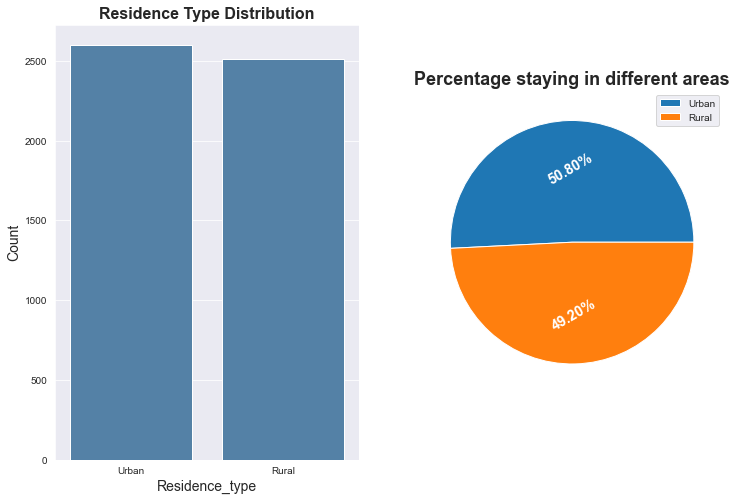

In [121]:
print('Unique values Residence_type count: ', df['Residence_type'].nunique())
print('Residence_type values: ', df['Residence_type'].unique())
print(df.Residence_type.value_counts(),sep='\n')

fig=plt.figure(figsize=(12,8))
sns.set_style('darkgrid')

ax1=plt.subplot(1,2,1)
sns.countplot(data=df,x='Residence_type',color='steelblue')
ax1.set_xlabel('Residence_type',fontsize=14)
ax1.set_ylabel('Count',fontsize=14)
ax1.set_title('Residence Type Distribution',fontweight='bold',fontsize=16)

ax2=plt.subplot(1,2,2)
ax2.pie(pd.value_counts(df['Residence_type']),labels=df.Residence_type.value_counts().index,
       autopct='%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : '30',
                     'color' : 'w'})

plt.legend()
ax2.set_title('Percentage staying in different areas', fontsize = 18, fontweight = 'bold')
plt.show()

Unique values smoking_status count:  4
smoking_status values:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


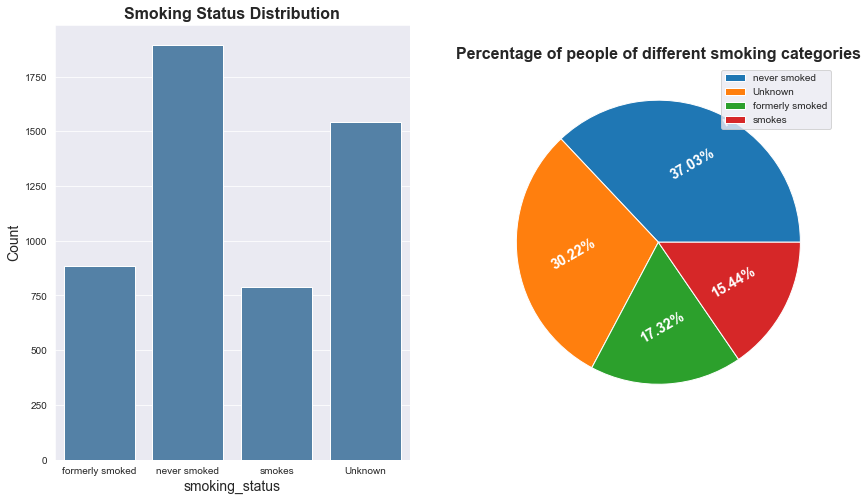

In [122]:
print('Unique values smoking_status count: ', df['smoking_status'].nunique())
print('smoking_status values: ', df['smoking_status'].unique())
print(df.smoking_status.value_counts(),sep='\n')

plt.figure(figsize=(14,8))
sns.set_style('darkgrid')

ax1=plt.subplot(1,2,1)
sns.countplot(data=df,x='smoking_status',color='steelblue')
ax1.set_xlabel('smoking_status',fontsize=14)
ax1.set_ylabel('Count',fontsize=14)
ax1.set_title('Smoking Status Distribution',fontweight='bold',fontsize=16)

ax2=plt.subplot(1,2,2)
plt.pie(pd.value_counts(df['smoking_status']),
       labels=df.smoking_status.value_counts().index,
       autopct='%.2f%%',
       textprops={'size':'x-large',
                  'fontweight':'bold',
                  'rotation':'30',
                  'color':'w'
                 
       })
plt.legend()
ax2.set_title('Percentage of people of different smoking categories', fontsize = 16, fontweight = 'bold')

plt.show()

Stroke Distribution
0    4861
1     249
Name: stroke, dtype: int64


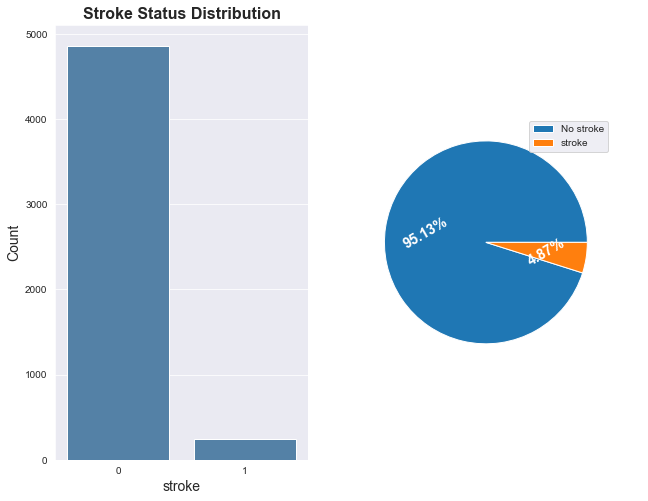

In [118]:
print('Stroke Distribution',df.stroke.value_counts(),sep='\n')
sns.set_style('darkgrid')

plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
ax1=sns.countplot(data=df,x='stroke',color='steelblue')
plt.xlabel('stroke',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Stroke Status Distribution',fontweight='bold',fontsize=16)

ax2=plt.subplot(1,2,2)
plt.pie(pd.value_counts(df['stroke']),
       labels=['No stroke','stroke'],
       autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : '30',
                     'color' : 'w'})

plt.legend()
plt.show()

### Distribution Plot

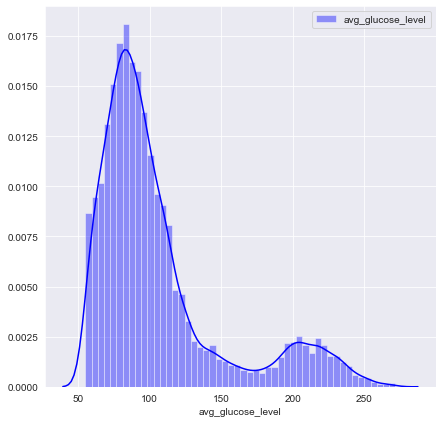

In [125]:
fig=plt.figure(figsize=(7,7))
sns.distplot(df.avg_glucose_level,color='blue',label='avg_glucose_level',kde=True)
plt.legend()

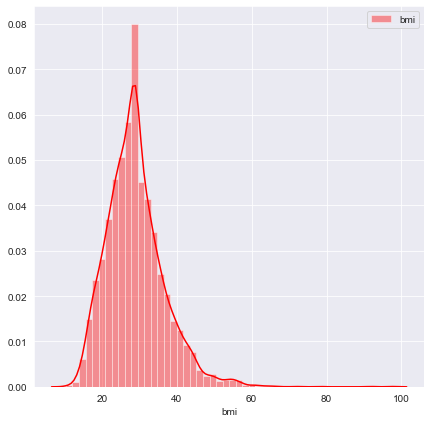

In [127]:
fig=plt.figure(figsize=(7,7))
sns.distplot(df.bmi, color='red',label='bmi',kde=True)
plt.legend()

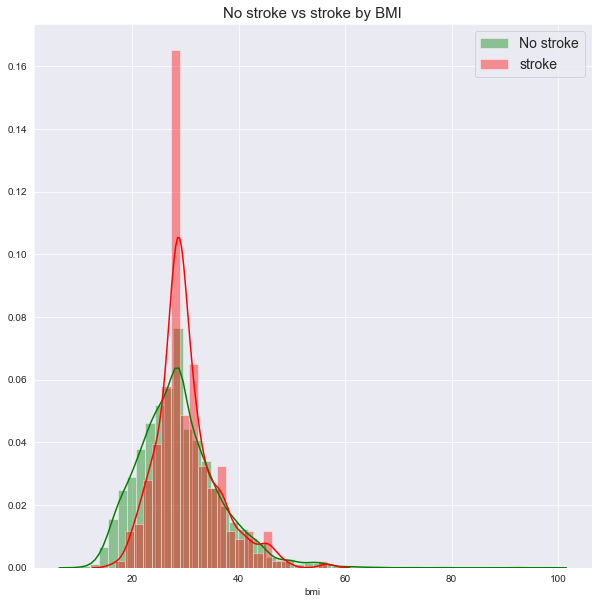

In [164]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['stroke']==0]['bmi'],color='green',label='No stroke')
sns.distplot(df[df['stroke']==1]['bmi'],color='red',label='stroke')

plt.title('No stroke vs stroke by BMI',fontsize=15)
plt.xlim=([10,100])
plt.legend(fontsize = 14)
plt.show()


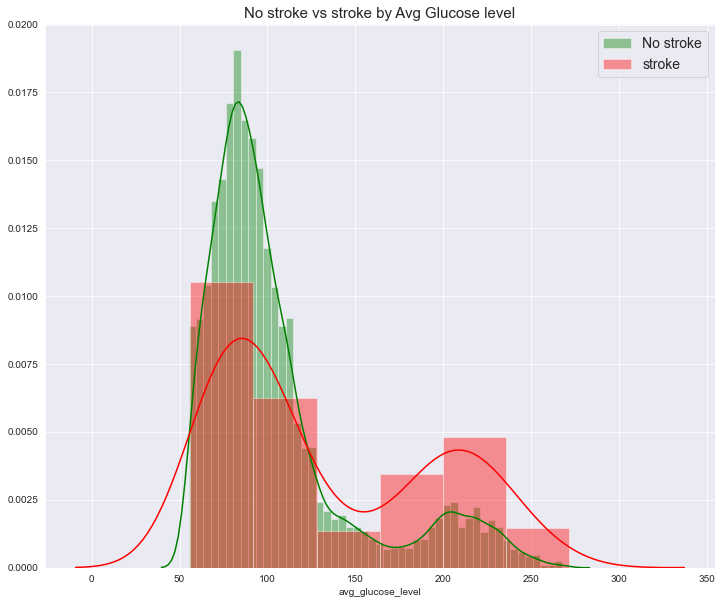

In [163]:
plt.figure(figsize=(12,10))
sns.distplot(df[df['stroke']==0]['avg_glucose_level'],color='green',label='No stroke')
sns.distplot(df[df['stroke']==1]['avg_glucose_level'],color='red',label='stroke')
plt.title('No stroke vs stroke by Avg Glucose level',fontsize=15)
plt.legend(fontsize = 14)
plt.show()


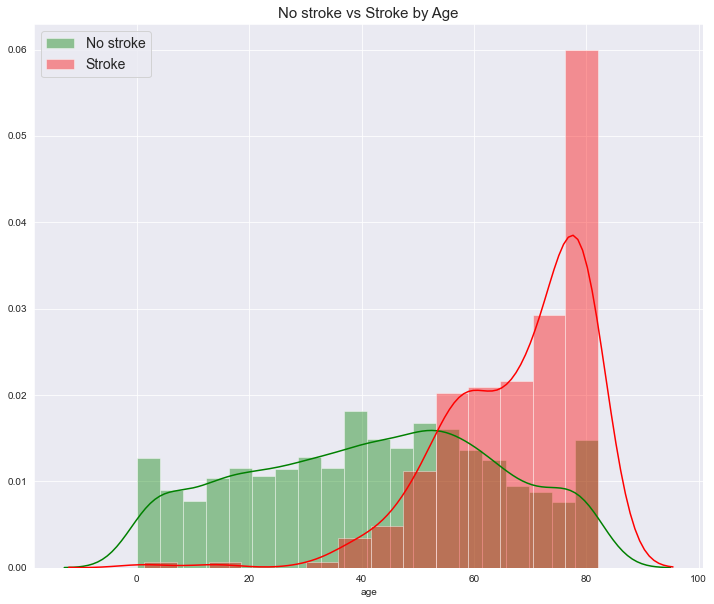

In [162]:
plt.figure(figsize=(12,10))
sns.distplot(df[df['stroke']==0]['age'],color='green',label='No stroke')
sns.distplot(df[df['stroke']==1]['age'],color='red',label='Stroke')
plt.title('No stroke vs Stroke by Age',fontsize=15)
plt.legend(fontsize = 14)
plt.show()


### Scatter Plot

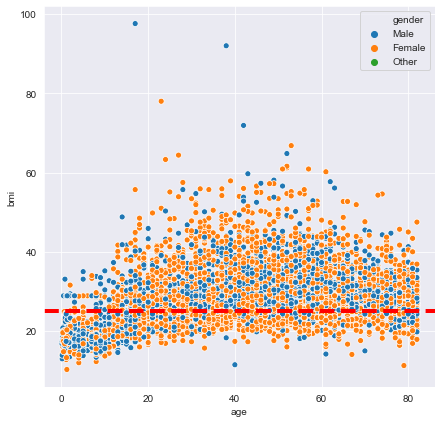

In [149]:
fig=plt.figure(figsize=(7,7))
graph=sns.scatterplot(data=df,x='age',y='bmi',hue='gender')
graph.axhline(y=25, linewidth=4, color='r', linestyle='--')
plt.show()

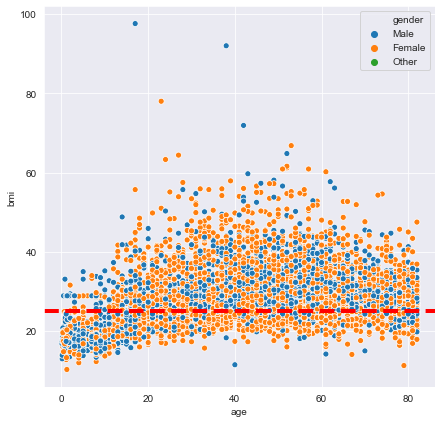

In [150]:
fig=plt.figure(figsize=(7,7))
graph=sns.scatterplot(data=df,x='age',y='bmi',hue='gender')
graph.axhline(y=25,linewidth=4,color='r',linestyle='--')
plt.show()

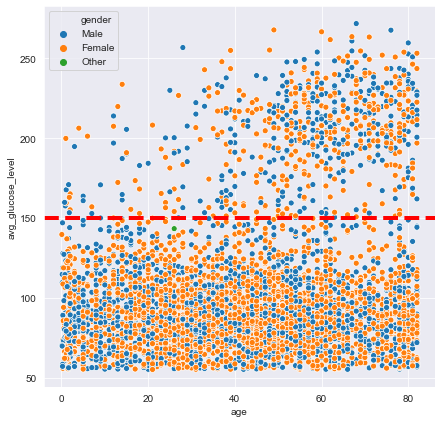

In [155]:
fig=plt.figure(figsize=(7,7))
graph=sns.scatterplot(data=df,x='age',y='avg_glucose_level',hue='gender')
graph.axhline(y=150, linewidth=4,color='r',linestyle='--')
plt.show()

### Violin Plots

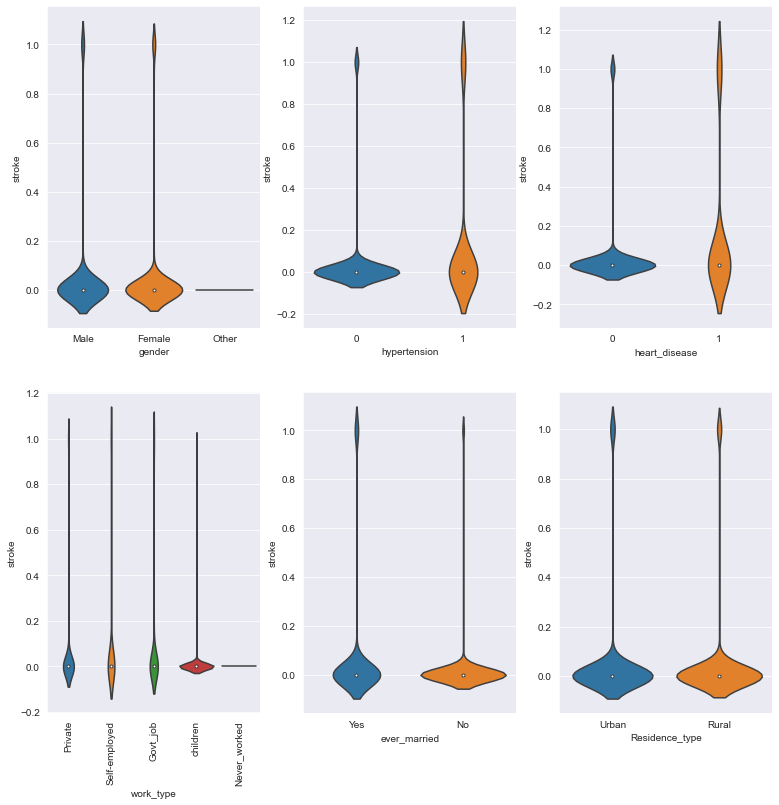

In [36]:
plt.figure(figsize=(13,13))
sns.set_style('darkgrid')

plt.subplot(2,3,1)
sns.violinplot(x='gender',y='stroke',data=df)

plt.subplot(2,3,2)
sns.violinplot(x='hypertension',y='stroke',data=df)

plt.subplot(2,3,3)
sns.violinplot(x='heart_disease',y='stroke',data=df)

plt.subplot(2,3,4)
sns.violinplot(x='work_type',y='stroke',data=df)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.violinplot(x='ever_married',y='stroke',data=df)


plt.subplot(2,3,6)
sns.violinplot(x='Residence_type',y='stroke',data=df)

plt.show()


### Piar Plots

<Figure size 720x720 with 0 Axes>

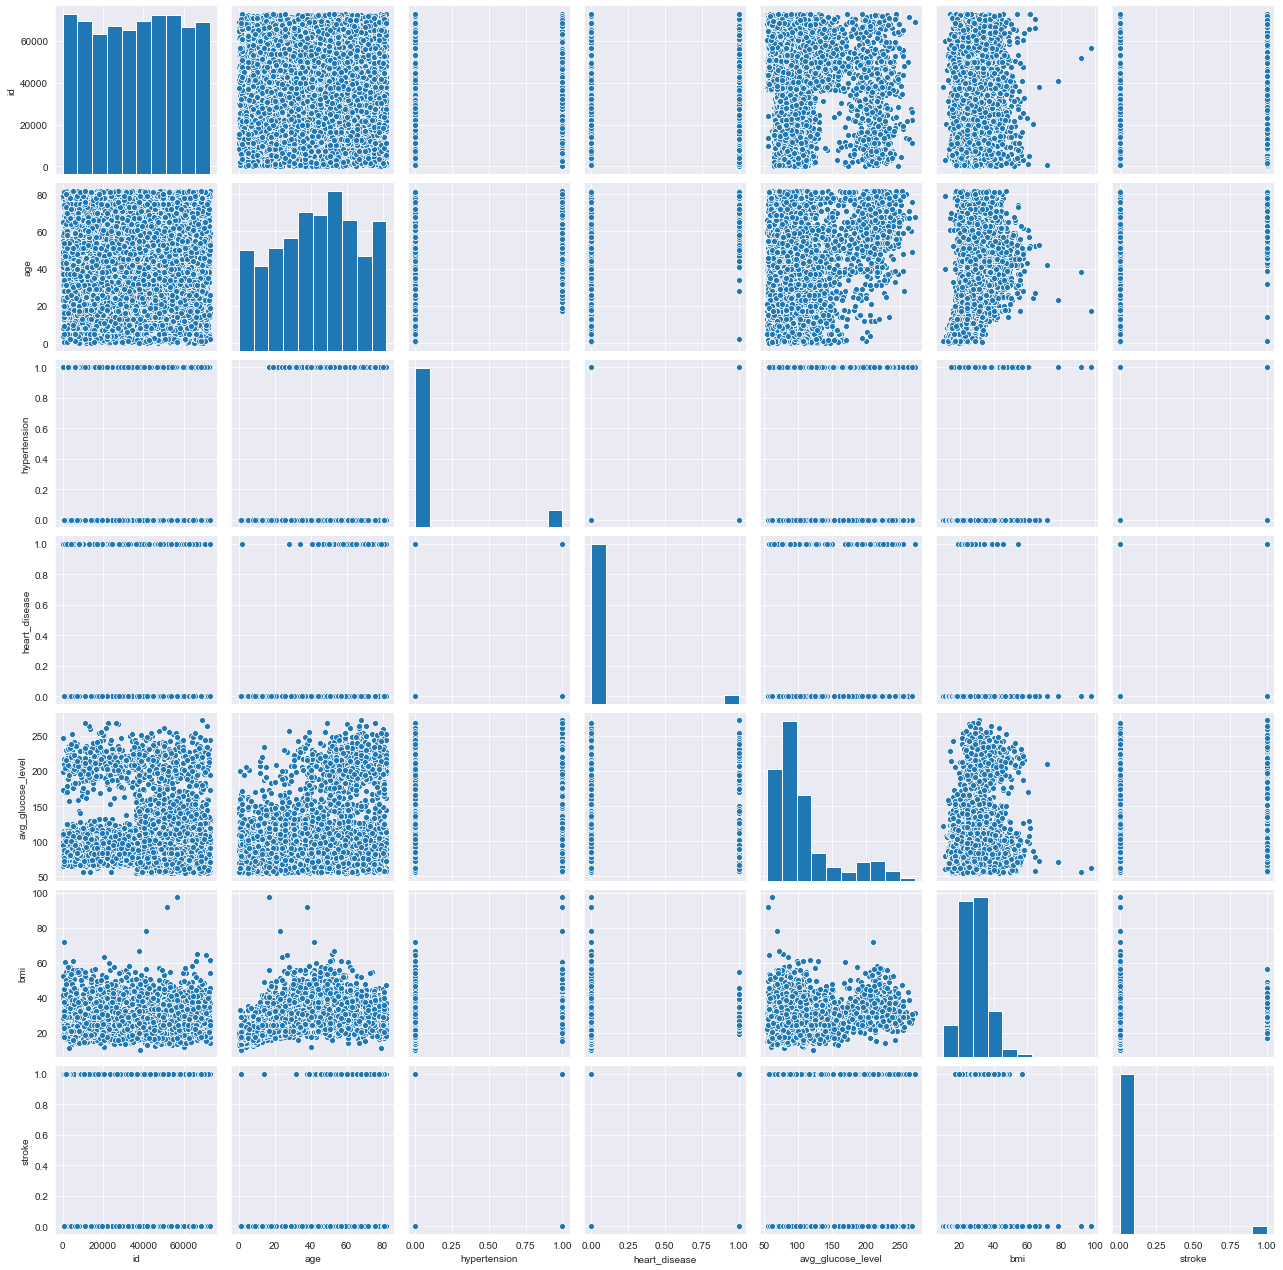

In [178]:
fig=plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

# Data Processing

In [179]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


### Label Encoder

In [189]:
label_encoder=LabelEncoder()
df['gender']=label_encoder.fit_transform(df['gender'])
df['ever_married']=label_encoder.fit_transform(df['ever_married'])
df['work_type']=label_encoder.fit_transform(df['work_type'])
df['Residence_type']=label_encoder.fit_transform(df['Residence_type'])
df['smoking_status']=label_encoder.fit_transform(df['smoking_status'])

### X and Y splitting

In [197]:
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

print('X Shape', x.shape)
print('Y Shape',y.shape)

X Shape (5110, 10)
Y Shape (5110,)


### Column Transformation and OneHotEncoder

In [ ]:
ct=